<a href="https://colab.research.google.com/github/ADS1105/Finance-Retrieval-Support-System/blob/main/LSTM_Code_Campaign_Recommendationfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00


In [1]:
!pip3 install tensorflow
#2.11.0

In [31]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import random
from keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional ,Activation  ,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import random
import time
import tensorflow as tf
tf.random.set_seed(21)
import tensorflow as tf
tf.random.set_seed(21)
import matplotlib.pyplot as plt
import ast
import re
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from keras.optimizers import SGD
from keras.models import Model
import pickle

In [32]:
drop = ['status' ,'engagement_medium' ,'message_category', 'campaign_delivery_time' ,'responded_flag' ,'delivery_date',
        'last_batch_nbd' ,'payment_dayofweek' ,'positively_reacted_flag' ,'last_batch_payment_flag','statement_balance_current_limit_percentage',
       'total_clicked_till_prev_date' ,'total_duration_category_BASIC_till_prev_date' ,'risk',
    'total_duration_category_CHARGES_till_prev_date' ,'total_duration_category_CLEAN_till_prev_date' ,
    'total_duration_category_CLEAN TRACK_till_prev_date','city' ,'month' ,'con_' ,
    'last_batch_intensity_till_date' ,'last_batch_overall_max_duration_voiceBot','last_batch_user_clicked_counts_overall' ,
        'smartTEXT_CLEAN TRACK_till_prev_date' ,'smartTEXT_BASIC_till_prev_date' ,'voiceBot_CLEAN TRACK_till_prev_date' ,
        'smartTEXT_BASIC_till_prev_date' ,'voiceBot_CHARGES_till_prev_date' ,'voiceBot_CLEAN_till_prev_date' ,'smartTEXT_CLEAN_till_prev_date',
       'smartTEXT_CLEAN TRACK_till_prev_date' , 'last_batch_payment_dayofweek','voiceBot_CHARGES_on_last_day','voiceBot_CLEAN_on_last_day',
       'city' ,'cumulative_positively_reacted_prev_date' ,'no_of_active_campaign_days_till_prev_date_voiceBot']

In [33]:
#data_1 = pd.read_parquet('final_data_sample_4.parquet')
data = pd.read_parquet('/no_payment_data_sample_3.parquet')

In [34]:
data.shape

(85242, 79)

In [35]:
data.shape

(85242, 79)

In [36]:
data.drop(columns=drop ,inplace=True)
data.shape

(85242, 45)

In [37]:
data.columns

Index(['loan_account_no', 'batch_no', 'content_language', 'age', 'principal_outstanding', 'NBD', 'intensity_till_prev_date', 'cumulative_responded_prev_date', 'cumulative_reacted_prev_date', 'avg_intensity_till_prev_date', 'intensity_till_prev_date_smartTEXT', 'cumulative_responded_prev_date_smartTEXT', 'cumulative_reached_prev_date_smartTEXT', 'avg_intensity_till_prev_date_smartTEXT', 'intensity_till_prev_date_voiceBot', 'cumulative_reached_prev_date_voiceBot', 'cumulative_responded_prev_date_voiceBot', 'avg_intensity_till_prev_date_voiceBot', 'max_duration_prev_day_voiceBot', 'avg_duration_prev_day_voiceBot', 'voiceBot_BASIC_till_prev_date', 'voiceBot_BASIC_on_last_day', 'voiceBot_CLEAN TRACK_on_last_day', 'smartTEXT_BASIC_on_last_day', 'smartTEXT_CLEAN_on_last_day', 'smartTEXT_CLEAN TRACK_on_last_day', 'voiceBot_BASIC_responded_till_prev_date', 'voiceBot_CHARGES_responded_till_prev_date', 'voiceBot_CLEAN_responded_till_prev_date', 'voiceBot_CLEAN TRACK_responded_till_prev_date',
   

In [38]:
data['content_language'] = data['content_language'].apply(lambda x: 1 if x == 'EN' else 0)

In [39]:
data['sequence'] = data['sequence'].apply(lambda x: re.sub('-' ,',' ,x))

In [40]:
sc = StandardScaler()
data[['principal_outstanding']] = sc.fit_transform(data[['principal_outstanding']])

In [41]:
column_to_move = data.pop("NBD")
data.insert(2, "NBD", column_to_move)

In [42]:
data.head(10)

,loan_account_no,batch_no,NBD,content_language,age,principal_outstanding,intensity_till_prev_date,cumulative_responded_prev_date,cumulative_reacted_prev_date,avg_intensity_till_prev_date,intensity_till_prev_date_smartTEXT,cumulative_responded_prev_date_smartTEXT,cumulative_reached_prev_date_smartTEXT,avg_intensity_till_prev_date_smartTEXT,intensity_till_prev_date_voiceBot,cumulative_reached_prev_date_voiceBot,cumulative_responded_prev_date_voiceBot,avg_intensity_till_prev_date_voiceBot,max_duration_prev_day_voiceBot,avg_duration_prev_day_voiceBot,voiceBot_BASIC_till_prev_date,voiceBot_BASIC_on_last_day,voiceBot_CLEAN TRACK_on_last_day,smartTEXT_BASIC_on_last_day,smartTEXT_CLEAN_on_last_day,smartTEXT_CLEAN TRACK_on_last_day,voiceBot_BASIC_responded_till_prev_date,voiceBot_CHARGES_responded_till_prev_date,voiceBot_CLEAN_responded_till_prev_date,voiceBot_CLEAN TRACK_responded_till_prev_date,smartTEXT_BASIC_responded_till_prev_date,smartTEXT_CLEAN_responded_till_prev_date,smartTEXT_CLEAN TRACK_responded_till_prev_date,last_batch_campaign_duration,last_batch_last_day_react,last_batch_cumulative_reacted,last_batch_cumulative_reached_voiceBot,last_batch_cumulative_reacted_voiceBot,last_batch_cumulative_reached_smartTEXT,total_reach_last_day,total_respond_last_day,total_react_last_day,max_positively_reacted_flag,sequence,target
0,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,1,"START,",SMS-12-CLEAN
1,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,",SMS-12-CLEAN
2,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,SMS,12,CLEAN,2,",SMS-12-CLEAN
3,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,SMS,12,CLEAN,2,SMS,12,CLE...",STOP
4,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1,"START,",SMS-10-CLEAN
5,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,",SMS-10-CLEAN
6,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,SMS,10,CLEAN,2,",SMS-10-CLEAN
7,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,SMS,10,CLEAN,2,SMS,10,CLE...",STOP
8,124000000630044,870,4,1,28,-0.786955,6.0,2.0,0.0,3.0,4.0,0.0,4.0,2.00,2.0,2.0,2.0,1.0,7.0,7.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1,"START,",SMS-12-BASIC
9,124000000630044,870,4,1,28,-0.786955,6.0,2.0,0.0,3.0,4.0,0.0,4.0,2.00,2.0,2.0,2.0,1.0,7.0,7.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,12,BASIC,2,",SMS-12-BASIC


In [43]:
data['target'].value_counts()

,count
target,
STOP,25144
IVR-17-BASIC,2688
IVR-12-BASIC,2446
SMS-12-CLEAN,2370
SMS-13-BASIC,2335
SMS-12-BASIC,2271
SMS-11-CLEAN,2020
IVR-16-BASIC,2003
SMS-10-CLEAN,1973


In [44]:
data.fillna(0 ,inplace=True)
data['seq_2'] = data.apply(lambda x : [x[i] for i in data.columns if i not in ['sequence' ,'target' ,'content_language']] ,axis = 1)
data = data[['seq_2' ,'sequence' ,'target' ,'content_language']]
#data['sequence'] = data['sequence'].apply(lambda x: x.split(':'))
data['sequence'] = data['sequence'].apply(lambda x: x.split(','))
data['sequence'] = data['sequence'].apply(lambda x: [i.strip() for i in x])
display(len(data['target'].value_counts()))
list1 = []
list1.append('START')
list1.append('STOP')
for i in data['sequence']:
    list1.extend(i)
p = list(set(list1))
word_int = {}
int_word = {}
display(len(p))
for i in range(len(set(list1))):
    word_int[p[i]] = i
    int_word[str(i)] = p[i]

80

28

In [45]:
word_int['CL_TRACK'] = word_int['CLEAN_TRACK']
del int_word[str(word_int['CL_TRACK'])]
int_word[str(word_int['CL_TRACK'])] = 'CL_TRACK'

In [46]:
word_int

{'': 0,
 '18': 1,
 'CLEAN': 2,
 '2': 3,
 '3': 4,
 '17': 5,
 '3.2': 6,
 '15': 7,
 '13': 8,
 'SMS': 9,
 'START': 10,
 '16': 11,
 '2.1': 12,
 '3.5': 13,
 'CLEAN_TRACK': 14,
 '8': 15,
 'STOP': 16,
 '10': 17,
 '14': 18,
 '9': 19,
 'BASIC': 20,
 '19': 21,
 '3.1': 22,
 '3.3': 23,
 'IVR': 24,
 '11': 25,
 'CHARGES': 26,
 '12': 27,
 'CL_TRACK': 14}

In [47]:
b = ch = cl = c = st = 0

for i in data['sequence']:
    for j in i:
        if j == 'CLEAN':
            c += 1
        if j == 'CLEAN_TRACK':
            cl += 1
        if j == 'CHARGES' :
            ch += 1
        if j == 'BASIC' :
            b += 1
        if j == 'STOP' :
            st += 1

In [48]:
for i in data['target']:
    if i == 'STOP' :
        st += 1

In [49]:
st

25144

In [50]:
data.head(2)

,seq_2,sequence,target,content_language
0,"[124000000630044, 870, 0, 28, -0.7869548166620...","[START, ]",SMS-12-CLEAN,1
1,"[124000000630044, 870, 0, 28, -0.7869548166620...","[START, SMS, 12, CLEAN, 2, ]",SMS-12-CLEAN,1


In [51]:
data['seq_to_integer'] = data['sequence'].apply(lambda x : [word_int[p] for p in x][:-1])
data['number_array'] = data['seq_2']+data['seq_to_integer']
data['id'] = data['number_array'].apply(lambda x : x[0])
data['batch'] = data['number_array'].apply(lambda x : x[1])
data['number_array'] = data['number_array'].apply(lambda x: x[2:])
data = data[['id', 'batch' ,'number_array' ,'target' ,'content_language']]
data['target_char'] = data['target']

In [52]:
data

,id,batch,number_array,target,content_language,target_char
0,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
1,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
2,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
3,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",STOP,1,STOP
4,124000000630044,870,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",SMS-10-CLEAN,1,SMS-10-CLEAN
...,...,...,...,...,...,...
202484,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",SMS-13-BASIC,1,SMS-13-BASIC
202485,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-13-BASIC,1,IVR-13-BASIC
202486,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-15-BASIC,0,IVR-15-BASIC
202487,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-17-BASIC,0,IVR-17-BASIC


In [53]:
data['NBD'] = data['number_array'].apply(lambda x : x[0])

In [54]:
#data.loc[0]['number_array']
len(np.unique(data.id))

4000

In [55]:
id = shuffle(np.unique(data.id)[:20000])
data = data[data['id'].isin(id)]

In [56]:
data['target'] = data['target'].apply(lambda x: [i.strip() for i in x.split('-')])
p = data['target'].apply(lambda x : len(x))
data['target'] = data['target'].apply(lambda x : ['BASIC' if 'BASIC' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CL_TRACK' if 'CLEAN_TRACK' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CHARGES' if 'CHARGES' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CLEAN' if 'CLEAN' in i else i for i in x ])


In [57]:
p = []
for i in data['target']:
    p.extend(i)
data['target'] = data['target'].apply(lambda x: [i[:-1] if ',' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x: [word_int[i.strip()] for i in x])
data['target'] = data['target'].apply(lambda x : '-'.join([str(i) for i in x]))


In [58]:
data

,id,batch,number_array,target,content_language,target_char,NBD
0,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
1,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
2,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
3,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",16,1,STOP,0
4,124000000630044,870,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",9-17-2,1,SMS-10-CLEAN,2
...,...,...,...,...,...,...,...
202484,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",9-8-20,1,SMS-13-BASIC,7
202485,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-8-20,1,IVR-13-BASIC,7
202486,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-7-20,0,IVR-15-BASIC,7
202487,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-5-20,0,IVR-17-BASIC,7


In [59]:
word_int

{'': 0,
 '18': 1,
 'CLEAN': 2,
 '2': 3,
 '3': 4,
 '17': 5,
 '3.2': 6,
 '15': 7,
 '13': 8,
 'SMS': 9,
 'START': 10,
 '16': 11,
 '2.1': 12,
 '3.5': 13,
 'CLEAN_TRACK': 14,
 '8': 15,
 'STOP': 16,
 '10': 17,
 '14': 18,
 '9': 19,
 'BASIC': 20,
 '19': 21,
 '3.1': 22,
 '3.3': 23,
 'IVR': 24,
 '11': 25,
 'CHARGES': 26,
 '12': 27,
 'CL_TRACK': 14}

In [60]:
#data['target_char'].value_counts()
data['target'].value_counts()

,count
target,
16,25144
24-5-20,2688
24-27-20,2446
9-27-2,2370
9-8-20,2335
9-27-20,2271
9-25-2,2020
24-11-20,2003
9-17-2,1973


In [61]:
#data
test_id = shuffle(np.unique(data.id))[:2000]
train = data[data.id.isin(test_id) == False]
test = data[data.id.isin(test_id)]

In [62]:
len(data.id.unique())

4000

In [63]:
# test = test.iloc[15000,:]
test.to_csv('dummy_test_final_sample_4_5.csv')

In [64]:
train.head()

,id,batch,number_array,target,content_language,target_char,NBD
20,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
21,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
22,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0
23,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",16,1,STOP,0
24,124000000632553,870,"[2, 26, -0.6766346312957401, 9.0, 2.0, 0.0, 3....",24-17-2,1,IVR-10-CLEAN,2


In [65]:
train['length'] = train['number_array'].apply(lambda x : len(x))
display(train['length'].max())
input_sequence = [i for i in train['number_array']]
len(input_sequence)


81

42607

In [66]:
input_sequences = np.array(pad_sequences(input_sequence, maxlen=150, padding='pre'))
input_sequence = np.array(input_sequences)
X = input_sequence
X.shape

(42607, 150)

In [67]:
y = pd.get_dummies(train['target'])
y1 = pd.get_dummies(train['content_language'])

In [68]:
state_label = list(y.columns)
content_label = list(y1.columns)
len(state_label) ,len(content_label)

(79, 2)

In [69]:
response = [word_int[str(i)] for i in [2,3,2.1,3.1,3.2,3.3,3.4,3.5] if str(i) in word_int]

In [70]:
myvar1 = state_label
myvar2 = word_int
myvar3 = int_word
myvar4 = response
myvar5 = content_label

with open('state_label_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar1, file)
with open('word_int_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar2, file)
with open('int_word_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar3, file)
with open('response_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar4, file)
with open('content_label_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar5, file)

## Model Architechure

In [71]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#model = tf.keras.Sequential()
vocab_size = len(train['target'].value_counts())
sequence_length = 134
input_layer = Input(shape=(X.shape[1], n_features))
_= LSTM(128, activation='relu',kernel_regularizer=l2(0.05), input_shape=(X.shape[1], n_features) ,return_sequences=True)(input_layer)
_ = LSTM(64, activation='relu' ,kernel_regularizer=l2(0.05))(_)
seq = Dense(len(train['target'].value_counts()) ,name='seq' ,activation = 'softmax')(_)
lang = Dense(2 ,activation = 'sigmoid' ,name='lang')(_)
model = Model(inputs=input_layer, outputs=[seq, lang])
model.compile(

    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss={
         "seq": tf.keras.losses.CategoricalCrossentropy(),
        "lang": tf.keras.losses.BinaryCrossentropy(),
    },
    metrics = {"seq" :'accuracy' ,
                   "lang" :'accuracy'}
)

## Model Training

In [72]:
random.seed(21)
n = X.shape[0] // 2
i = 0
k = n
for _ in range(2):
    x = X[i:n]
    print(i ,n ,'dddddddddddddd')
    target = y.iloc[i:n]
    target1 = y1.iloc[i:n]
    i = n
    n = n + k
    print(x.shape)
    history = model.fit(x, [target ,target1], epochs=5, verbose=1 , batch_size = 256 ,validation_split=0.2)
    model.save('model_output_sample_4_5.keras')  # creates a HDF5 file 'my_model.h5'
    #     #returns a compiled model
    #     identical to the previous one
    model = load_model('model_output_sample_4_5.keras')
    time.sleep(20)
    print("### part is done")

0 21303 dddddddddddddd
(21303, 150, 1)
Epoch 1/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - lang_accuracy: 0.3944 - lang_loss: 0.7036 - loss: 13.2559 - seq_accuracy: 0.0993 - seq_loss: 4.2664 - val_lang_accuracy: 0.7134 - val_lang_loss: 0.6758 - val_loss: 11.8617 - val_seq_accuracy: 0.2997 - val_seq_loss: 3.8051
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - lang_accuracy: 0.6533 - lang_loss: 0.6766 - loss: 11.4567 - seq_accuracy: 0.2903 - seq_loss: 3.6734 - val_lang_accuracy: 0.7407 - val_lang_loss: 0.6011 - val_loss: 10.4246 - val_seq_accuracy: 0.2999 - val_seq_loss: 3.5008
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - lang_accuracy: 0.6774 - lang_loss: 0.6321 - loss: 10.0451 - seq_accuracy: 0.2911 - seq_loss: 3.3264 - val_lang_accuracy: 0.7322 - val_lang_loss: 0.5606 - val_loss: 9.3049 - val_seq_accuracy: 0.3009 - val_seq_loss: 3.3214
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - lang_accuracy: 0.6828 - lang_loss: 0.6026 - loss: 8.9686 - seq_accuracy: 0.3053 - seq_loss: 

In [73]:
history.history['val_loss']

[7.0649495124816895,
 6.53120231628418,
 6.069997787475586,
 5.6704559326171875,
 5.316636085510254]

In [74]:
train

,id,batch,number_array,target,content_language,target_char,NBD,length
20,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0,41
21,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0,45
22,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",9-27-2,1,SMS-12-CLEAN,0,49
23,124000000632553,870,"[0, 26, -0.6766346312957401, 13.0, 2.0, 0.0, 3...",16,1,STOP,0,53
24,124000000632553,870,"[2, 26, -0.6766346312957401, 9.0, 2.0, 0.0, 3....",24-17-2,1,IVR-10-CLEAN,2,41
...,...,...,...,...,...,...,...,...
202484,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",9-8-20,1,SMS-13-BASIC,7,41
202485,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-8-20,1,IVR-13-BASIC,7,45
202486,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-7-20,0,IVR-15-BASIC,7,49
202487,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",24-5-20,0,IVR-17-BASIC,7,53


In [75]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 150, 128)  │     66,560 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq (Dense)         │ (None, 79)        │      5,135 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lang (Dense)        │ (None, 2)         │        130 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 363,701 (1.39 MB)

 Trainable params: 121,233 (473.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,468 (947.14 KB)

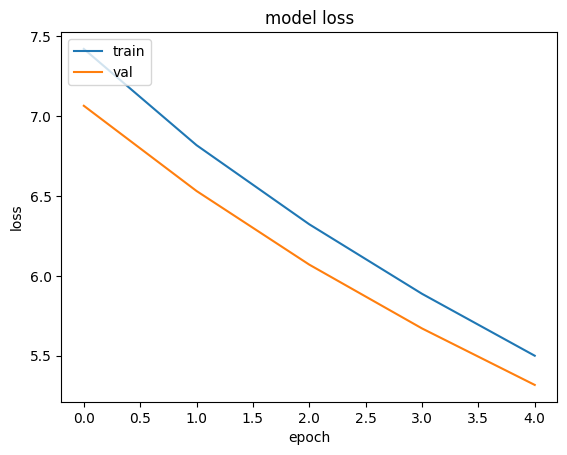

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Load Test Data

In [77]:
test_duumy = pd.read_csv('dummy_test_final_sample_4_5.csv')
test_duumy['number_array'] = test_duumy['number_array'].apply(lambda x : ast.literal_eval(x))
test_duumy['days'] = test_duumy['number_array'].apply(lambda x: x[0])
test_duumy[test_duumy['id'] == 4111460100150527].head(3)

,Unnamed: 0,id,batch,number_array,target,content_language,target_char,NBD,days


## Model Prediction

In [79]:
with open('state_label_sample_input_4_5.pkl', 'rb') as file:
    label = pickle.load(file)
with open('word_int_sample_input_4_5.pkl', 'rb') as file:
    word_int = pickle.load(file)
with open('int_word_sample_input_4_5.pkl', 'rb') as file:
    int_word = pickle.load(file)
with open('response_sample_input_4_5.pkl', 'rb') as file:
    response = pickle.load(file)
with open('content_label_sample_input_4_5.pkl', 'rb') as file:
    content = pickle.load(file)


In [80]:
model = load_model('model_output_sample_4_5.keras')

In [81]:
def predict(input_array):
    list1 = []
    lang_list = []
    input_array1 = np.array(pad_sequences([input_array], maxlen=150, padding='pre'))
    seq,lan = model.predict(input_array1.reshape((1, 150, 1)))
    #print(seq ,lan)
    p = np.argmax(seq)
    language = np.argmax(lan)
    output = label[p]
    if '-' not in output:
        d = {}
        arr , lan= model.predict(input_array1.reshape((1, 150, 1)))
        #print(arr)
        for i ,j in enumerate(arr[0]):
            d[i] = j
        d = dict(sorted(d.items() ,key = lambda x : x[1] ,reverse = True))
        key = list(d.keys())[1]
        output = label[key]
        language = np.argmax(lan)
        print("output" ,output ,language)
    xx = []
    pp = []
    for j in output.split('-'):
        xx.append(int(j))
        pp.append(int_word[j])
    i = 0
    list1.append('-'.join(pp))
    lang_list.append('RE' if language == 0 else 'EN')
    #print(xx,pp)
    while i < 10:
        input_array = input_array + xx + [random.choice(response)]
        input_array1 = np.array(pad_sequences([input_array], maxlen=150, padding='pre'))
        input_array1 = input_array1.reshape((1,150, 1))
        seq,lan = model.predict(input_array1)
        p = np.argmax(seq)
        language = np.argmax(lan)
        output = label[p]
        if '-' not in output:
            list1.append('STOP')
            lang_list.append(None)
            return list1 , lang_list
        xx = []
        pp = []
        for j in output.split('-'):
            xx.append(int(j))
            pp.append(int_word[j])
        list1.append('-'.join(pp))
        lang_list.append('RE' if language == 0 else 'EN')
        i += 1
    #print(list1)
    return list1 ,lang_list

In [82]:
len(test_duumy.id.unique())

2000

In [84]:
new_df = pd.DataFrame()
k = 0
ids_batch = test_duumy.groupby(['id' ,'batch']).count().reset_index()[['id' ,'batch']].values
for ids , batch in ids_batch[:50]:
    print(k ,'dd')
    df = test_duumy[(test_duumy['id'] == ids) & (test_duumy['batch'] == batch)]
    days = df.days.unique()
    #display(df)
    for i in days:
        sdf = df[df['days'] == i]
        #display(sdf)
        array = np.array(sdf['number_array'].values)[0]
        res , lang = predict(array)
        if len(res) > sdf.shape[0]:
            for i in range(len(res)-len(sdf)):
                sdf = pd.concat([sdf, pd.DataFrame([{}])], ignore_index=True)
        #print(res ,'ffff')
        sdf['predict'] = res + [None]*(len(sdf) - len(res))
        sdf['language'] = lang + [None]*(len(sdf) - len(res))
        new_df = pd.concat([new_df, sdf], ignore_index=True)
        #display(new_df)
    k += 1

0 dd
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1 dd
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/s

In [85]:
new_df['predict'].value_counts()

,count
predict,
STOP,235
SMS-11-CLEAN,90
IVR-12-BASIC,74
IVR-17-BASIC,65
SMS-12-BASIC,55
IVR-11-CLEAN,46
IVR-16-CLEAN,23
SMS-13-CL_TRACK,21
IVR-15-CL_TRACK,20


In [86]:
new_df

,Unnamed: 0,id,batch,number_array,target,content_language,target_char,NBD,days,predict,language
0,0.0,1.240000e+14,870.0,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1.0,SMS-12-CLEAN,0.0,0,SMS-11-CLEAN,EN
1,1.0,1.240000e+14,870.0,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1.0,SMS-12-CLEAN,0.0,0,STOP,None
2,2.0,1.240000e+14,870.0,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",9-27-2,1.0,SMS-12-CLEAN,0.0,0,None,None
3,3.0,1.240000e+14,870.0,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",16,1.0,STOP,0.0,0,None,None
4,4.0,1.240000e+14,870.0,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",9-17-2,1.0,SMS-10-CLEAN,2.0,2,SMS-11-CLEAN,EN
...,...,...,...,...,...,...,...,...,...,...,...
1107,2219.0,1.240000e+14,870.0,"[5, 31, -0.03407520746281213, 3.0, 1.0, 0.0, 3...",16,0.0,STOP,5.0,5,None,None
1108,2220.0,1.240000e+14,870.0,"[6, 31, -0.03407520746281213, 0.0, 0.0, 0.0, 0...",9-18-20,1.0,SMS-14-BASIC,6.0,6,IVR-12-BASIC,EN
1109,2221.0,1.240000e+14,870.0,"[6, 31, -0.03407520746281213, 0.0, 0.0, 0.0, 0...",9-18-20,1.0,SMS-14-BASIC,6.0,6,SMS-12-BASIC,EN
1110,2222.0,1.240000e+14,870.0,"[6, 31, -0.03407520746281213, 0.0, 0.0, 0.0, 0...",24-18-20,1.0,IVR-14-BASIC,6.0,6,IVR-17-BASIC,EN
